In [ ]:
#importing necessary libraries
import numpy as np 
import pandas as pd

**Reading data**


In [ ]:
df = pd.read_csv('abcnews-date-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


**Data Pre-processing**

In [ ]:
df.shape

(1226258, 2)

In [ ]:
df.describe()

,publish_date
count,1.226258e+06
mean,2.010875e+07
std,4.720924e+04
min,2.003022e+07
25%,2.007052e+07
50%,2.011051e+07
75%,2.014113e+07
max,2.020123e+07


In [ ]:
df.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

In [ ]:
df.dtypes

publish_date      int64
headline_text    object
dtype: object

**Feature Engineering**

In [ ]:
#creating date, year and month as a seperate columns from publish_date
df["year"] = df["publish_date"].astype(str).str[:4].astype(np.int64)
df["month"] = df["publish_date"].astype(str).str[4:6].astype(np.int64)
df["date"] = df["publish_date"].astype(str).str[6:].astype(np.int64)
df.head()

,publish_date,headline_text,year,month,date
0,20030219,aba decides against community broadcasting lic...,2003,2,19
1,20030219,act fire witnesses must be aware of defamation,2003,2,19
2,20030219,a g calls for infrastructure protection summit,2003,2,19
3,20030219,air nz staff in aust strike for pay rise,2003,2,19
4,20030219,air nz strike to affect australian travellers,2003,2,19


In [ ]:
df.year.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
df.month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

In [ ]:
#creating another column word_count to understand how many words in each headline_text
df["word_count"] = df["headline_text"].str.len()
df.head()

,publish_date,headline_text,year,month,date,word_count
0,20030219,aba decides against community broadcasting lic...,2003,2,19,50
1,20030219,act fire witnesses must be aware of defamation,2003,2,19,46
2,20030219,a g calls for infrastructure protection summit,2003,2,19,46
3,20030219,air nz staff in aust strike for pay rise,2003,2,19,40
4,20030219,air nz strike to affect australian travellers,2003,2,19,45


In [ ]:
# Creating character count, average word length, punctuations count, stopword count columns for each headline text
df['char_count'] = df['headline_text'].apply(lambda x: len(str(x)))

df['mean_word_length'] = df['headline_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

import string
df['punctuation_count'] = df['headline_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize

import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
english_stops= set(stopwords.words('english'))
df['stop_word_count'] = df['headline_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in english_stops]))
df.head()


,publish_date,headline_text,year,month,date,word_count,char_count,mean_word_length,punctuation_count,stop_word_count
0,20030219,aba decides against community broadcasting lic...,2003,2,19,50,50,7.500000,0,1
1,20030219,act fire witnesses must be aware of defamation,2003,2,19,46,46,4.875000,0,2
2,20030219,a g calls for infrastructure protection summit,2003,2,19,46,46,5.714286,0,2
3,20030219,air nz staff in aust strike for pay rise,2003,2,19,40,40,3.555556,0,2
4,20030219,air nz strike to affect australian travellers,2003,2,19,45,45,5.571429,0,1


**Visualization the features extracted**

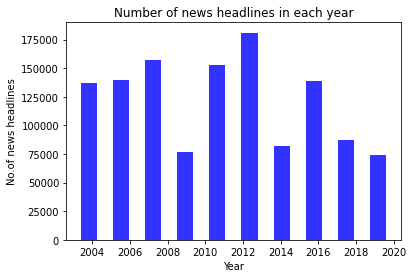

In [ ]:
# Visualizing how many articles where published every year, month and each day
import matplotlib.pyplot as plt
plt.hist(df['year'], facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Year')
plt.ylabel('No.of news headlines')
plt.title('Number of news headlines in each year')
plt.show()

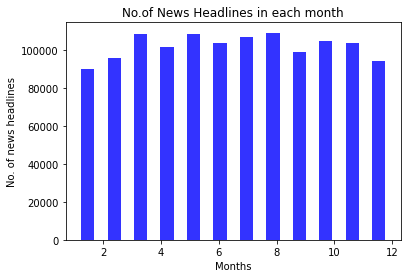

In [ ]:
plt.hist(df['month'],12, facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Months')
plt.ylabel('No. of news headlines')
plt.title('No.of News Headlines in each month')
plt.show()

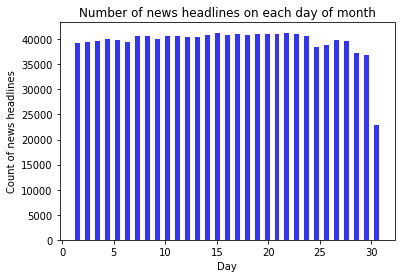

In [ ]:
plt.hist(df['date'],31, facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Day')
plt.ylabel('Count of news headlines')
plt.title('Number of news headlines on each day of month')
plt.show()

In [ ]:
# defining the new features in a list
features = ['word_count', 'stop_word_count', 'mean_word_length', 'char_count', 'punctuation_count']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb470c7cfd0>,
      dtype=object)

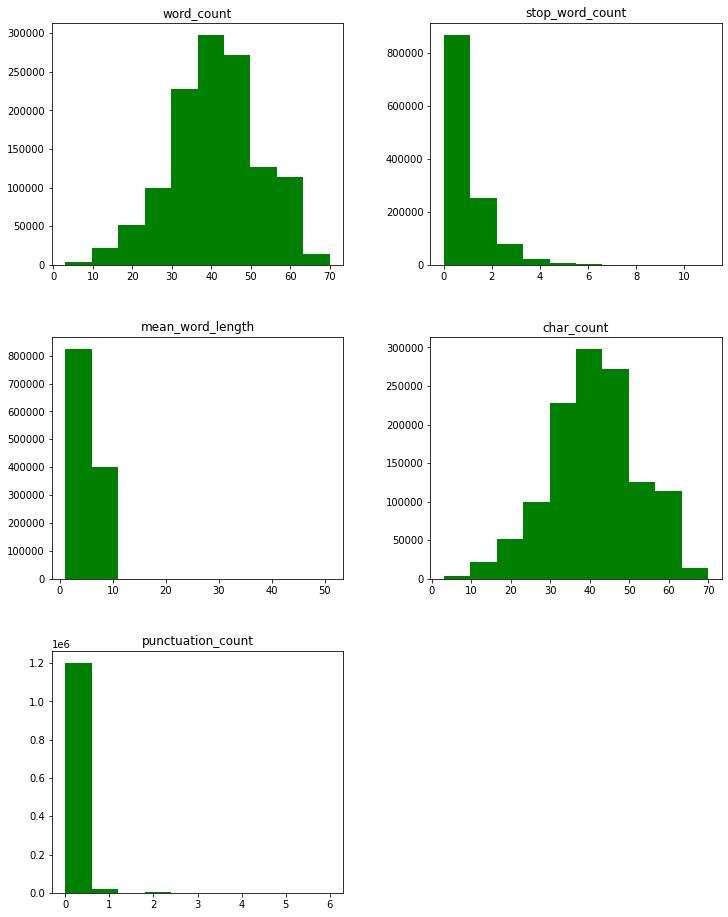

In [ ]:
# plotting histograms for the new features
df[features].hist(figsize = (12,16), color='green', grid=False, bins=10)

**Text Classification**

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
from numpy import argmax

In [ ]:
classifier = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


In [ ]:
sample_headline_text=df['headline_text'][:1000]

In [ ]:
candidate_labels = ["renewable", "politics", "emission", "temperature", "emergency", "advertisment"]
candidate_results = [0, 0, 0, 0, 0, 0]

for sent in sample_headline_text.values:
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels)

    SCORES = res["scores"]
    CLASSES = res["labels"]
    BEST_INDEX = argmax(SCORES)
    predicted_class = CLASSES[BEST_INDEX]
    predicted_score = SCORES[BEST_INDEX]

    if predicted_class == 'renewable' and predicted_score > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if predicted_class == 'politics' and predicted_score > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if predicted_class == 'emission' and predicted_score > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if predicted_class == 'temperature' and predicted_score > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if predicted_class == 'emergency' and predicted_score > 0.5:
        candidate_results[4] = candidate_results[4] + 1
    if predicted_class == 'advertisment' and predicted_score > 0.5:
        candidate_results[5] = candidate_results[5] + 1
 
    
    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print()

print(candidate_results)

act fire witnesses must be aware of defamation
['emission', 'emergency', 'temperature', 'renewable', 'advertisment', 'politics']
[0.671912670135498, 0.12633615732192993, 0.11947888880968094, 0.06294111162424088, 0.011076904833316803, 0.00825420580804348]

air nz staff in aust strike for pay rise
['emission', 'temperature', 'emergency', 'advertisment', 'politics', 'renewable']
[0.5271357297897339, 0.17796404659748077, 0.14966486394405365, 0.09618441015481949, 0.032544929534196854, 0.016505971550941467]

antic delighted with record breaking barca
['emission', 'advertisment', 'temperature', 'emergency', 'renewable', 'politics']
[0.6439234018325806, 0.1459626853466034, 0.10467113554477692, 0.05406339094042778, 0.040799692273139954, 0.010579731315374374]



/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:910: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


bushfire victims urged to see centrelink
['emergency', 'emission', 'temperature', 'advertisment', 'renewable', 'politics']
[0.5025433897972107, 0.2497611939907074, 0.10255458205938339, 0.09804937243461609, 0.02919478341937065, 0.017896637320518494]

call for ethanol blend fuel to go ahead
['renewable', 'advertisment', 'emission', 'emergency', 'politics', 'temperature']
[0.600139319896698, 0.19594863057136536, 0.09688589721918106, 0.04681083932518959, 0.041064392775297165, 0.01915096864104271]

cemeteries miss out on funds
['emission', 'temperature', 'emergency', 'advertisment', 'renewable', 'politics']
[0.6596245169639587, 0.2605804204940796, 0.03498111665248871, 0.027310488745570183, 0.009001380763947964, 0.008502118289470673]

councillor to contest wollongong as independent
['politics', 'emission', 'renewable', 'temperature', 'advertisment', 'emergency']
[0.8017693758010864, 0.06183360889554024, 0.061664238572120667, 0.030185339972376823, 0.028938956558704376, 0.015608414076268673]



In [ ]:
labels_scores = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(labels_scores, columns=['labels','values'])

df_chart

,labels,values
0,renewable,33
1,politics,39
2,emission,120
3,temperature,2
4,emergency,74
5,advertisment,19


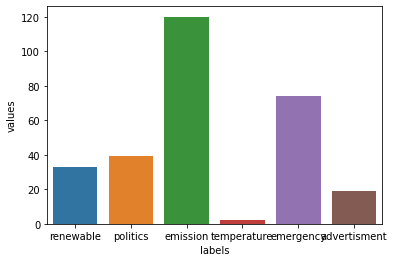

In [ ]:
import seaborn as sns
sns.barplot(data=df_chart,x = 'labels',y = 'values')

**Sentiment Analysis**

In [ ]:
#Creating a corpus from the headline_text
corpus = str()
for i in range(len(df['headline_text'])):
    corpus += (' ')+df['headline_text'][i]

In [ ]:
# Toenization
import nltk
nltk.download('punkt')
words = nltk.word_tokenize(corpus)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# removing stopwords and punctuations
f_words = [w for w in words if not w in english_stops] 

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
fp_words = [w for w in f_words if not w in punctuations] 

In [ ]:
# To find the frequency of clean words
freq = nltk.FreqDist(fp_words)

for key,val in freq.items():
  str(key) + ':' + str(val)



[('police', 39384), ('new', 32824), ('man', 30512), ('says', 23014), ('us', 20045), ('court', 18014), ('govt', 17057), ('council', 16934), ('australia', 16652), ('nsw', 15749), ('interview', 15545), ('fire', 15350), ('australian', 13186), ('wa', 13079), ('plan', 12922)]


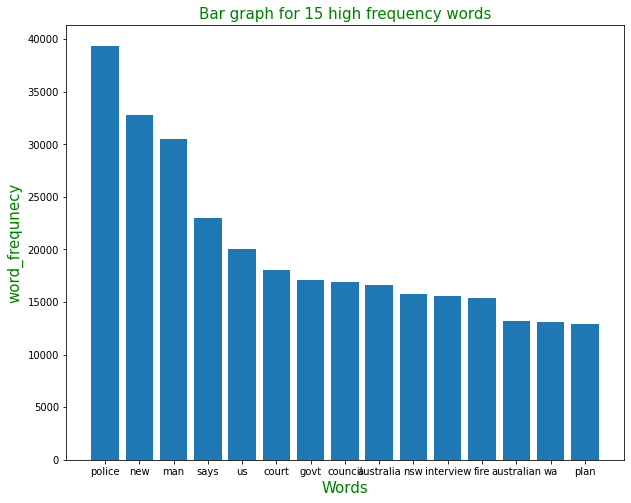

In [ ]:
#removing words whose frequency is less than 500 
for x in list(freq.keys()):
  if freq[x]<=500:
    del freq[x]

# finding top 15 commonly used words
freq_2=freq.most_common(15)
print(freq_2)
words=[x[0] for x in freq_2]
word_freq=[x[1] for x in freq_2]

# plotting a graph for top 15 used words.
plt.figure(figsize=(10,8))
plt.bar(words, word_freq)
plt.title('Bar graph for 15 high frequency words', fontsize=15, color='Green')
plt.xlabel('Words', fontsize=15, color='Green')
plt.ylabel('word_frequnecy', fontsize=15, color='Green')
plt.show()

In [ ]:
sentiment_labels = ['positive','negative']
sequence = list(sample_headline_text.values)

In [ ]:
sent = classifier(sequence, sentiment_labels)

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:910: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
sent

[{'labels': ['negative', 'positive'],
  'scores': [0.9875787496566772, 0.012421276420354843],
  'sequence': 'aba decides against community broadcasting licence'},
 {'labels': ['negative', 'positive'],
  'scores': [0.99607253074646, 0.003927456680685282],
  'sequence': 'act fire witnesses must be aware of defamation'},
 {'labels': ['negative', 'positive'],
  'scores': [0.6098466515541077, 0.39015331864356995],
  'sequence': 'a g calls for infrastructure protection summit'},
 {'labels': ['negative', 'positive'],
  'scores': [0.9354528784751892, 0.0645470842719078],
  'sequence': 'air nz staff in aust strike for pay rise'},
 {'labels': ['negative', 'positive'],
  'scores': [0.9901187419891357, 0.00988126639276743],
  'sequence': 'air nz strike to affect australian travellers'},
 {'labels': ['positive', 'negative'],
  'scores': [0.9616013765335083, 0.03839866444468498],
  'sequence': 'ambitious olsson wins triple jump'},
 {'labels': ['positive', 'negative'],
  'scores': [0.9938040971755981

**Pre-Processing of the text for topic modelling and clustering**

In [ ]:
data = df.sample(10000, random_state=42)
len(data)

10000

In [ ]:
data = data.reset_index(drop=True)
data.head()

,publish_date,headline_text,year,month,date,word_count,char_count,mean_word_length,punctuation_count,stop_word_count
0,20100214,billion dollar hole in liberals hospital plan,2010,2,14,45,45,5.571429,0,1
1,20100429,planned bauxite mine brings river worries,2010,4,29,41,41,6.000000,0,0
2,20130116,hong kong social worker sze lai shan speaks to,2013,1,16,46,46,4.222222,0,2
3,20131105,teenage girl shot in back in western sydney,2013,11,5,43,43,4.500000,0,2
4,20101214,united overpowers arsenal to the top,2010,12,14,36,36,5.166667,0,2


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
np.random.seed(42)

In [ ]:
def lemmatize_stemming(doc):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(doc, pos='v'))

def text_preprocess(doc):
    # min_len and max_len: minimum and maximum lengths of token (inclusive)
    processed_words = gensim.utils.simple_preprocess(doc,min_len=3, max_len=15)  
    stop_words = gensim.parsing.preprocessing.STOPWORDS
    tokens = [lemmatize_stemming(token) for token in processed_words if token not in stop_words]

    return tokens

In [ ]:
nltk.download('wordnet')
doc_sample = data.iloc[551,1]  
print(doc_sample)
print()
print(text_preprocess(doc_sample))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
heinz offers new pay deal

['heinz', 'offer', 'new', 'pay', 'deal']


In [ ]:
processed_docs = data['headline_text'].apply(text_preprocess)

**Convert Corpus to Vectors**

Two ways of transforming corpus to word vectors.
1. Bag-of-words representation, uses word count and the order of the word does not matter.
2. TF-IDF this transforms the word count of bag-of-words into weight of the word. 

**1. Bag-of-Words**

In [ ]:
# create a dictionary - a mapping between words and their integer ids

dictionary = gensim.corpora.Dictionary(processed_docs)  # this dictionary is not the regular Python dictionary

In [ ]:
# Take a look at the first 10 words in the dictionary. 
#Note the dictionary consists of the word ID and the word pairs. The word ID is created for this specific corpus.

# print out the first 10 words in the dictionary

for i, (k, v) in enumerate(dictionary.iteritems()):
    print(k, v)
    if i > 10:
        break

0 billion
1 dollar
2 hole
3 hospit
4 liber
5 plan
6 bauxit
7 bring
8 river
9 worri
10 hong
11 kong


Next, we are going to filter the dictionary with some parameters.The filter_extremes method filters out tokens in the dictionary by their frequency.

no_below (int, optional) – Keep tokens which are contained in at least no_below documents.

no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).

keep_n (int, optional) – Keep only the first keep_n most frequent tokens.

keep_tokens (iterable of str) – Iterable of tokens that must stay in dictionary after filtering.


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.6, keep_n=5000)

In [ ]:
#doc2bow converts document into the bag-of-words (BoW) format, which is a list of (token_id, token_count) tuples.

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[8]

[(7, 1), (27, 1), (28, 1), (29, 1)]

The above output means: in document 8, the token_id 7 appears 1 time, token_id 27 appears 1 time.
 If we want to know which word the token_id corresponds to, we will need to map it out from the pre-defined dictionary.

In [ ]:
# let's print out an example

bow_doc_8 = bow_corpus[8]
for id, count in bow_doc_8:
    print(id, dictionary[id], count)

7 speak 1
27 action 1
28 china 1
29 intern 1


As we mentioned earlier, Bag-of-words simply uses word count frequency to create vectors. Next, we will try the second appraoch, tf-idf.

**2. TF-IDF**

In [ ]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [ ]:
# transform bow_corpus to word and weight

corpus_tfidf = tfidf[bow_corpus]  # different syntax than Scikit-Learn,it uses []
corpus_tfidf

In [ ]:
# print out the same example - document 8

corpus_tfidf_8 = corpus_tfidf[8]
for id, count in corpus_tfidf_8:
    print(id, dictionary[id], count)

7 speak 0.5008718014121772
27 action 0.4920550884054503
28 china 0.43828090061545466
29 intern 0.5611765147260984


Notice how tf-idf transforms the word count to word weight. Previously, these words all had the same word which 1, but they have different weight.

**Topic Modeling with LDA**

  

**1. Bag of Words**

In [ ]:
# For 10,000 news headlines we choose there can be many topics but we limit to to only 20 topics.

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=10, random_state=42)

In [ ]:
for idx, topic in lda_model.print_topics():
    print(f'Topic{idx}:')
    print(topic)

Topic0:
0.126*"new" + 0.068*"hit" + 0.056*"australian" + 0.048*"industri" + 0.033*"high" + 0.030*"safeti" + 0.029*"head" + 0.024*"hope" + 0.024*"challeng" + 0.022*"energi"
Topic1:
0.075*"car" + 0.072*"test" + 0.064*"child" + 0.059*"accus" + 0.050*"sex" + 0.041*"guilti" + 0.038*"abus" + 0.035*"children" + 0.032*"men" + 0.031*"tas"
Topic2:
0.054*"coronavirus" + 0.051*"famili" + 0.044*"port" + 0.040*"inquiri" + 0.039*"food" + 0.031*"hear" + 0.030*"make" + 0.029*"darwin" + 0.027*"teen" + 0.027*"gas"
Topic3:
0.130*"plan" + 0.097*"interview" + 0.036*"protest" + 0.034*"union" + 0.032*"welcom" + 0.032*"park" + 0.032*"victim" + 0.029*"bushfir" + 0.028*"beat" + 0.024*"violenc"
Topic4:
0.089*"australia" + 0.057*"hous" + 0.051*"crash" + 0.048*"continu" + 0.037*"public" + 0.034*"resid" + 0.034*"aussi" + 0.030*"probe" + 0.030*"centr" + 0.023*"research"
Topic5:
0.167*"man" + 0.085*"charg" + 0.063*"jail" + 0.062*"year" + 0.060*"attack" + 0.055*"die" + 0.054*"hospit" + 0.046*"murder" + 0.027*"fall" + 0

**2. TF-IDF**

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dictionary, passes=10,random_state=42)

In [ ]:
for idx, topic in lda_model_tfidf.print_topics():
    print(f'Topic{idx}:')
    print(topic)

Topic0:
0.078*"hit" + 0.060*"search" + 0.042*"train" + 0.042*"prison" + 0.041*"head" + 0.037*"farmer" + 0.035*"life" + 0.031*"fail" + 0.028*"match" + 0.028*"energi"
Topic1:
0.056*"test" + 0.047*"child" + 0.040*"car" + 0.039*"countri" + 0.036*"sex" + 0.034*"servic" + 0.033*"abc" + 0.032*"inquiri" + 0.030*"children" + 0.030*"abus"
Topic2:
0.057*"school" + 0.051*"shoot" + 0.039*"port" + 0.032*"despit" + 0.032*"research" + 0.026*"violenc" + 0.026*"teen" + 0.026*"sell" + 0.025*"week" + 0.024*"miner"
Topic3:
0.157*"interview" + 0.047*"return" + 0.034*"union" + 0.034*"welcom" + 0.032*"victim" + 0.032*"park" + 0.028*"star" + 0.026*"centr" + 0.025*"station" + 0.022*"plan"
Topic4:
0.049*"hous" + 0.047*"crash" + 0.043*"aussi" + 0.041*"australia" + 0.034*"public" + 0.032*"continu" + 0.032*"road" + 0.032*"probe" + 0.031*"beat" + 0.024*"make"
Topic5:
0.064*"die" + 0.055*"attack" + 0.041*"protest" + 0.041*"leav" + 0.038*"storm" + 0.036*"man" + 0.036*"famili" + 0.035*"murder" + 0.035*"hospit" + 0.030*

**Model Evaluation**

**1.Bag of Words Model**

In [ ]:
# let's use our favoriate sample - document 8

data.iloc[8,1]

'china speak out against international action in'

In [ ]:
# sort per the value (second element in the tuple)
for index, score in sorted(lda_model[bow_corpus[8]], key=lambda x: x[1], reverse=True): 
    print(f"{index}, {score}, {lda_model.print_topic(index, 5)}") # only print out the first 5 words in the topic

7, 0.6100000143051147, 0.083*"govt" + 0.067*"urg" + 0.050*"elect" + 0.049*"school" + 0.048*"china"
9, 0.21000000834465027, 0.059*"call" + 0.053*"warn" + 0.040*"push" + 0.039*"deal" + 0.039*"state"
0, 0.010000000707805157, 0.126*"new" + 0.068*"hit" + 0.056*"australian" + 0.048*"industri" + 0.033*"high"
1, 0.010000000707805157, 0.075*"car" + 0.072*"test" + 0.064*"child" + 0.059*"accus" + 0.050*"sex"
2, 0.010000000707805157, 0.054*"coronavirus" + 0.051*"famili" + 0.044*"port" + 0.040*"inquiri" + 0.039*"food"
3, 0.010000000707805157, 0.130*"plan" + 0.097*"interview" + 0.036*"protest" + 0.034*"union" + 0.032*"welcom"
4, 0.010000000707805157, 0.089*"australia" + 0.057*"hous" + 0.051*"crash" + 0.048*"continu" + 0.037*"public"
5, 0.010000000707805157, 0.167*"man" + 0.085*"charg" + 0.063*"jail" + 0.062*"year" + 0.060*"attack"
6, 0.010000000707805157, 0.121*"say" + 0.086*"death" + 0.065*"sydney" + 0.064*"day" + 0.041*"price"
8, 0.010000000707805157, 0.051*"south" + 0.050*"nation" + 0.048*"concer

In Bag-of-Words model, topic #4 is close to the true headline. We see there are australia, crash and public in the predicted topics.

**2. TF-IDF Model**

In [ ]:
# test the same doc on tf-idf model

for index, score in sorted(lda_model_tfidf[corpus_tfidf[8]], key=lambda x: x[1], reverse=True): 
    print(f"{index}, {score}, {lda_model.print_topic(index, 5)}")

7, 0.6825274229049683, 0.083*"govt" + 0.067*"urg" + 0.050*"elect" + 0.049*"school" + 0.048*"china"
0, 0.016709083691239357, 0.126*"new" + 0.068*"hit" + 0.056*"australian" + 0.048*"industri" + 0.033*"high"
1, 0.016709083691239357, 0.075*"car" + 0.072*"test" + 0.064*"child" + 0.059*"accus" + 0.050*"sex"
2, 0.016709083691239357, 0.054*"coronavirus" + 0.051*"famili" + 0.044*"port" + 0.040*"inquiri" + 0.039*"food"
3, 0.016709083691239357, 0.130*"plan" + 0.097*"interview" + 0.036*"protest" + 0.034*"union" + 0.032*"welcom"
4, 0.016709083691239357, 0.089*"australia" + 0.057*"hous" + 0.051*"crash" + 0.048*"continu" + 0.037*"public"
5, 0.016709083691239357, 0.167*"man" + 0.085*"charg" + 0.063*"jail" + 0.062*"year" + 0.060*"attack"
6, 0.016709083691239357, 0.121*"say" + 0.086*"death" + 0.065*"sydney" + 0.064*"day" + 0.041*"price"
8, 0.016709083691239357, 0.051*"south" + 0.050*"nation" + 0.048*"concern" + 0.046*"open" + 0.039*"rural"
9, 0.016709083691239357, 0.059*"call" + 0.053*"warn" + 0.040*"pu

From observation of the results obtained by testing the tf-idf model, we can tell that it performs similar to bag-of-words model. This can be observed in the predicted topic #4 where australia, crash, public all three appear same.

**Model Testing**

Testing model with unseen documents.

In [ ]:
unseen_doc = "US closes 5 military bases in Afghanistan as part of Taliban peace deal"
bow_vector = dictionary.doc2bow(text_preprocess(unseen_doc))
bow_vector

[(140, 1), (171, 1), (279, 1), (483, 1)]

In [ ]:
for index, score in sorted(lda_model[bow_vector], key=lambda x: x[1], reverse=True): # sort by 2nd element in the tuple
    print(f"{index}, {score}, {lda_model.print_topic(index, 5)}")

18, 0.4099999964237213, 0.127*"court" + 0.066*"qld" + 0.045*"law" + 0.038*"drug" + 0.037*"big"
9, 0.20999999344348907, 0.058*"call" + 0.053*"warn" + 0.040*"push" + 0.039*"deal" + 0.039*"state"
17, 0.20999999344348907, 0.046*"case" + 0.043*"return" + 0.041*"trial" + 0.037*"countri" + 0.036*"releas"
4, 0.010000000707805157, 0.090*"australia" + 0.058*"hous" + 0.051*"crash" + 0.048*"continu" + 0.037*"public"


The topic #4 is about the australia, crash and public which tells us about gives an idea of the australia news about the public suffering.